I'll be utilizing pandas, seaborn, numpy, scipy, and matplotlib to complete this project.

In [6]:
# imports
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [14]:
sg_total = pd.read_csv("2022-2023/sg_total.csv")
sg_total.drop(labels=["RANK","MOVEMENT","TOTAL SG:T","TOTAL SG:T2G","TOTAL SG:P","MEASURED ROUNDS"], axis=1, inplace=True)
sg_total.rename(columns={"AVG": "AVG_SG:T"}, inplace=True)

sg_off_tee = pd.read_csv("2022-2023/sg_off_tee.csv")
sg_off_tee.drop(labels=["PLAYER","RANK","MOVEMENT","TOTAL SG:OTT","MEASURED ROUNDS"], axis=1, inplace=True)
sg_off_tee.rename(columns={"AVG": "AVG_SG:OTT"}, inplace=True)

sg_approach_green = pd.read_csv("2022-2023/sg_approach_green.csv")
sg_approach_green.drop(labels=["PLAYER","RANK","MOVEMENT","TOTAL SG:APP","MEASURED ROUNDS"], axis=1, inplace=True)
sg_approach_green.rename(columns={"AVG": "AVG_SG:APP"}, inplace=True)

sg_around_green = pd.read_csv("2022-2023/sg_around_green.csv")
sg_around_green.drop(labels=["PLAYER","RANK","MOVEMENT","TOTAL SG:ARG","MEASURED ROUNDS"], axis=1, inplace=True)
sg_around_green.rename(columns={"AVG": "AVG_SG:ARG"}, inplace=True)

sg_putt = pd.read_csv("2022-2023/sg_putting.csv")
sg_putt.drop(labels=["PLAYER","RANK","MOVEMENT","TOTAL SG:PUTTING","MEASURED ROUNDS"], axis=1, inplace=True)
sg_putt.rename(columns={"AVG": "AVG_SG:PUTT"}, inplace=True)

club_head = pd.read_csv("2022-2023/club_head_speed.csv")
club_head.drop(labels=["PLAYER","RANK","MOVEMENT","TOTAL CLUB HEAD SPEED","TOTAL ATTEMPTS"], axis=1, inplace=True)
club_head.rename(columns={"AVG": "AVG_CLUB_HEAD_SPEED"}, inplace=True)

driving_acc = pd.read_csv("2022-2023/driving_acc.csv")
driving_acc.drop(labels=["PLAYER","RANK","FAIRWAYS HIT","POSSIBLE FAIRWAYS","MOVEMENT"], axis=1, inplace=True)
driving_acc.rename(columns={"%": "%_FAIRWAYS"}, inplace=True)

driving_dist = pd.read_csv("2022-2023/drive_dist.csv")
driving_dist.drop(labels=["PLAYER","RANK","TOTAL DISTANCE","TOTAL DRIVES","MOVEMENT"], axis=1, inplace=True)
driving_dist.rename(columns={"AVG": "AVG_DRIVE_DIST"}, inplace=True)

gir_percent = pd.read_csv("2022-2023/gir_percent.csv")
gir_percent.drop(labels=["PLAYER","RANK","GREENS HIT","# HOLES","RELATIVE/PAR","MOVEMENT"], axis=1, inplace=True)
gir_percent.rename(columns={"%": "%_GIR"}, inplace=True)

par3_avg = pd.read_csv("2022-2023/par3_avg.csv")
par3_avg.drop(labels=["PLAYER","RANK","TOTAL STROKES","TOTAL HOLES","MOVEMENT"], axis=1, inplace=True)
par3_avg.rename(columns={"AVG": "AVG_PAR3_SCORE"}, inplace=True)

par4_avg = pd.read_csv("2022-2023/par4_avg.csv")
par4_avg.drop(labels=["PLAYER","RANK","TOTAL STROKES","TOTAL HOLES","MOVEMENT"], axis=1, inplace=True)
par4_avg.rename(columns={"AVG": "AVG_PAR4_SCORE"}, inplace=True)

par5_avg = pd.read_csv("2022-2023/par5_avg.csv")
par5_avg.drop(labels=["PLAYER","RANK","TOTAL STROKES","TOTAL HOLES","MOVEMENT"], axis=1, inplace=True)
par5_avg.rename(columns={"AVG": "AVG_PAR5_SCORE"}, inplace=True)

top_10 = pd.read_csv("2022-2023/top_10.csv")
top_10.drop(labels=["PLAYER","RANK","MOVEMENT"], axis=1, inplace=True)
top_10.rename(columns={"TOP 10.00": "TOP_10_FINISHES"}, inplace=True)

money = pd.read_csv("2022-2023/money.csv")
money.drop(labels=["PLAYER","RANK","MOVEMENT","YTD VICTORIES"], axis=1, inplace=True)

In [15]:
data_frames = [sg_total, sg_off_tee, sg_approach_green, sg_around_green, sg_putt, club_head, driving_acc, driving_dist, gir_percent, par3_avg, par4_avg, par5_avg, top_10, money]

df_merge = pd.DataFrame()
df_merge = sg_total
for dataframe in data_frames:
    if dataframe is not sg_total:
        df_merge = pd.merge(df_merge, dataframe, on="PLAYER_ID")
df_merge

,PLAYER_ID,PLAYER,AVG_SG:T,AVG_SG:OTT,AVG_SG:APP,AVG_SG:ARG,AVG_SG:PUTT,AVG_CLUB_HEAD_SPEED,%_FAIRWAYS,AVG_DRIVE_DIST,%_GIR,AVG_PAR3_SCORE,AVG_PAR4_SCORE,AVG_PAR5_SCORE,TOP 10,1ST,2ND,3RD,MONEY
0,46046,Scottie Scheffler,2.314,1.021,1.194,0.399,-0.301,120.86,62.09%,310.3,74.43%,2.99,3.91,4.46,17,2,2,5,$21014342
1,28237,Rory McIlroy,2.102,0.907,0.721,0.309,0.164,122.80,53.25%,326.3,67.88%,2.97,3.95,4.55,13,2,2,2,$13921008
2,35450,Patrick Cantlay,1.869,0.852,0.564,0.147,0.305,117.86,65.51%,308.6,69.75%,3.08,3.93,4.44,10,0,2,2,$10372998
3,48081,Xander Schauffele,1.869,0.265,0.880,0.056,0.667,120.21,57.46%,304.1,68.45%,3.01,3.96,4.54,11,0,2,1,$8459066
4,30911,Tommy Fleetwood,1.699,0.388,0.462,0.355,0.493,117.33,61.82%,302.3,64.56%,3.00,3.99,4.56,9,0,1,2,$6510641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,35617,Martin Trainer,-1.099,-0.364,-0.650,-0.032,-0.053,117.22,56.41%,302.2,65.17%,3.14,4.02,4.63,1,0,0,0,$509265
150,33597,Harry Higgs,-1.226,-0.487,-0.844,-0.113,0.218,115.95,53.87%,301.6,64.68%,3.10,4.03,4.63,1,0,0,0,$718748
151,51414,Brent Grant,-1.449,0.806,-0.674,-0.500,-1.081,122.77,63.62%,311.2,68.39%,3.20,4.04,4.58,1,0,0,0,$466212
152,51950,Max McGreevy,-1.730,-0.439,-0.790,0.025,-0.527,109.57,59.17%,290.2,63.59%,3.07,4.10,4.70,1,0,0,0,$422905


In [16]:
print(df_merge.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PLAYER_ID            154 non-null    int64  
 1   PLAYER               154 non-null    object 
 2   AVG_SG:T             154 non-null    float64
 3   AVG_SG:OTT           154 non-null    float64
 4   AVG_SG:APP           154 non-null    float64
 5   AVG_SG:ARG           154 non-null    float64
 6   AVG_SG:PUTT          154 non-null    float64
 7   AVG_CLUB_HEAD_SPEED  154 non-null    float64
 8   %_FAIRWAYS           154 non-null    object 
 9   AVG_DRIVE_DIST       154 non-null    float64
 10  %_GIR                154 non-null    object 
 11  AVG_PAR3_SCORE       154 non-null    float64
 12  AVG_PAR4_SCORE       154 non-null    float64
 13  AVG_PAR5_SCORE       154 non-null    float64
 14  TOP 10               154 non-null    int64  
 15  1ST                  154 non-null    int

We can see from displaying the merged data frame's info, that there are no null values. The types of each column are mostly correct except we'll want to format %_GIR, %_FAIRWAYS, and MONEY into a compatible float type.

First, I will remove dollar signs and commas from the MONEY column and percentage signs in both the %_GIR and %_FAIRWAYS column.

In [50]:
df_merge['MONEY'] = df_merge['MONEY'].apply(lambda x: x.replace('$', '').replace(',', ''))
df_merge['%_FAIRWAYS'] = df_merge['%_FAIRWAYS'].apply(lambda x: x.replace('%', ''))
df_merge['%_GIR'] = df_merge['%_GIR'].apply(lambda x: x.replace('%', ''))

Then, I can change the types of the MONEY, %_GIR, and %_FAIRWAYS column to float.

In [51]:
df_merge['MONEY'] = df_merge['MONEY'].astype('float')
df_merge['%_GIR'] = df_merge['%_GIR'].astype('float')
df_merge['%_FAIRWAYS'] = df_merge['%_FAIRWAYS'].astype('float')
print(df_merge.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PLAYER_ID            154 non-null    int64  
 1   PLAYER               154 non-null    object 
 2   AVG_SG:T             154 non-null    float64
 3   AVG_SG:OTT           154 non-null    float64
 4   AVG_SG:APP           154 non-null    float64
 5   AVG_SG:ARG           154 non-null    float64
 6   AVG_SG:PUTT          154 non-null    float64
 7   AVG_CLUB_HEAD_SPEED  154 non-null    float64
 8   %_FAIRWAYS           154 non-null    float64
 9   AVG_DRIVE_DIST       154 non-null    float64
 10  %_GIR                154 non-null    float64
 11  AVG_PAR3_SCORE       154 non-null    float64
 12  AVG_PAR4_SCORE       154 non-null    float64
 13  AVG_PAR5_SCORE       154 non-null    float64
 14  TOP 10               154 non-null    int64  
 15  1ST                  154 non-null    int

We can see that after those changes, there is once again no null entries and all entries aside from the player's name are of type float or int. I will now, for graphical simplicity later, divide the money column by 100,000, so the new money column is described in units of hundred thousand dollars.

In [52]:
df_merge['MONEY'] = df_merge['MONEY'] / 100000

## Generate various plots

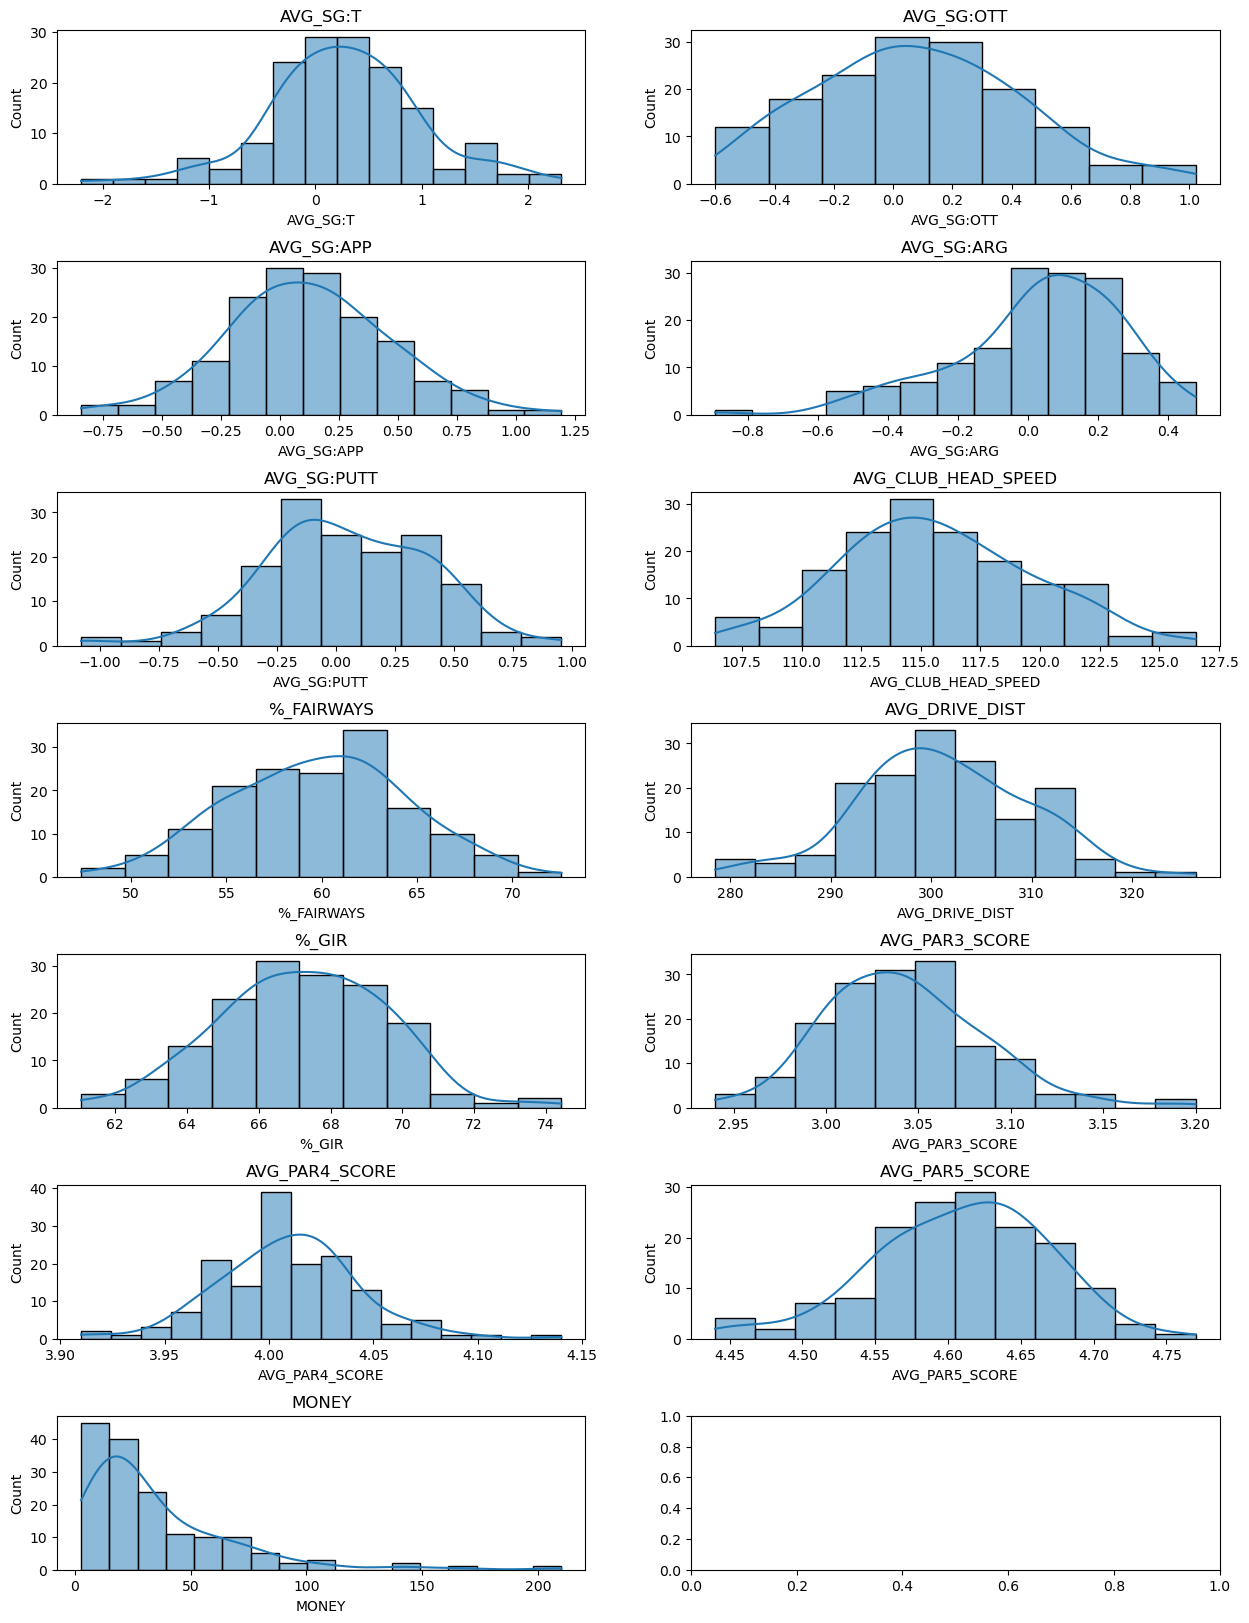

In [53]:
float_columns = df_merge.select_dtypes(include='float').columns

#Set up the subplots
num_plots = len(float_columns)
cols_per_row = 2  # You can adjust this based on your preference
num_rows = -(-num_plots // cols_per_row)  # Calculate the number of rows needed

# Create subplots
f, ax = plt.subplots(num_rows, 2, figsize=(15, 20))

row = 0
col = 0
# Iterate through float columns and create distribution plots
for i, column in enumerate(float_columns):
    g = sns.histplot(df_merge[column], ax=ax[row][col], kde=True)
    g.set(title=column)
    col += 1
    if col == 2:
        col = 0
        row += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

From generating various distribution plots, we can see that most stats are distributed normally among PGA Tour pros during the 2022-23 season. Notably however, money, average par 3 score, and strokes gained around the green do appear to have skew. Money earned throughout the season is right-skewed displaying a commonly contested issue in the PGA where a majority of tour pros make very little compared to other professional athletes (more on this in the following section). 

Average par 3 score appears to be somewhat right-skewed especially relative to par 4 and par 5 score indicating that pros most consistently shoot par or better on par 3s. Finally, average strokes gained around the green are left-skewed incicating that for a lot of pros, their around the green chipping game is very strong.

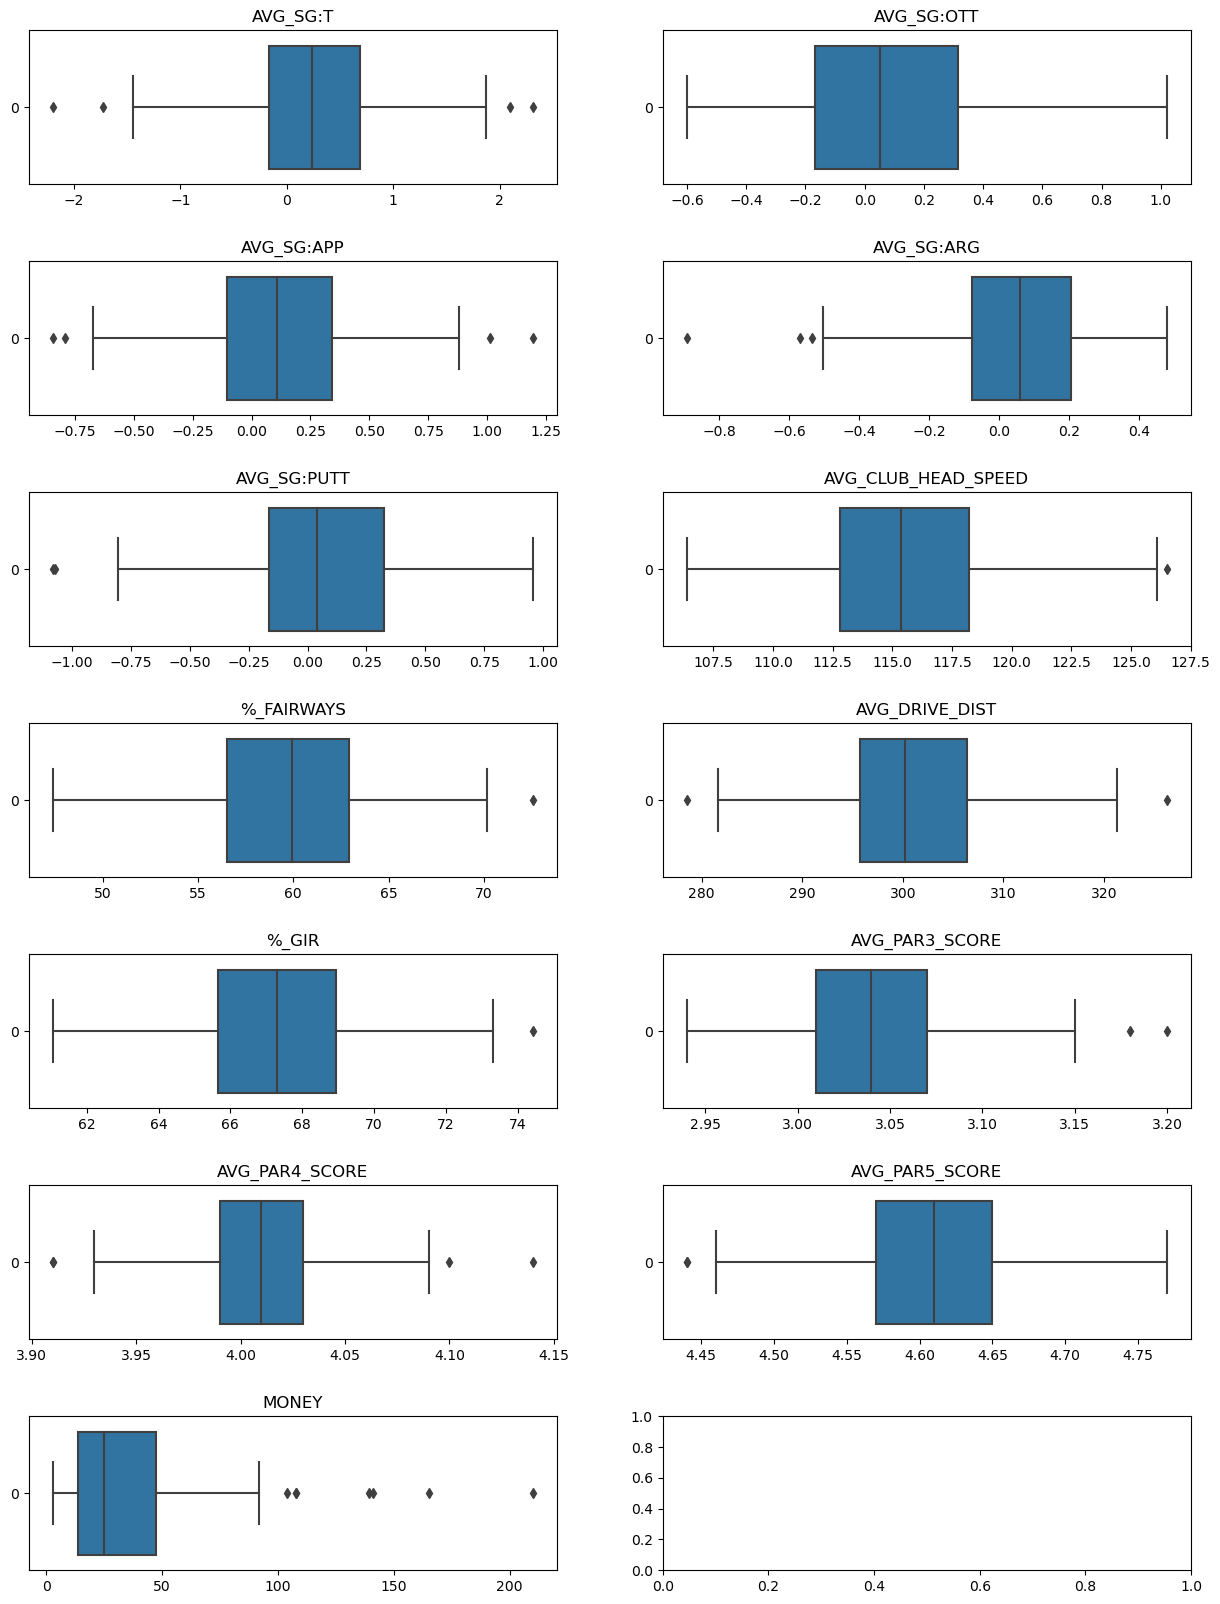

In [54]:
#Set up the subplots
num_plots = len(float_columns)
cols_per_row = 2  # You can adjust this based on your preference
num_rows = -(-num_plots // cols_per_row)  # Calculate the number of rows needed

# Create subplots
f, ax = plt.subplots(num_rows, 2, figsize=(15, 20))

row = 0
col = 0
# Iterate through float columns and create distribution plots
for i, column in enumerate(float_columns):
    g = sns.boxplot(df_merge[column], ax=ax[row][col], orient='h')
    g.set(title=column)
    col += 1
    if col == 2:
        col = 0
        row += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)


Looking deeper into the money stat, from the box plot above, one may notice that the middle 50% of PGA Pros earn less than \$500,000. Undoubtedly a very comfortable salary for most, this middle 50\% still recieved over four times less income than the highest earner. Let's look at this individual.

In [68]:
index = df_merge['MONEY'].idxmax()
max_income_player = df_merge.loc[index, 'PLAYER']
max_income = df_merge['MONEY'].max() * 100000
print(f"The player with the highest winnings of the 2022-23 season was {max_income_player}")
print(f"He made ${max_income}")

second_index = df_merge.drop(index)['MONEY'].idxmax()
second_max_income = df_merge.loc[second_index, 'MONEY'] * 100000
second_max_income_player = df_merge.loc[second_index, 'PLAYER']
print(f"The player with the second highest winnings of the 2022-23 season was {second_max_income_player}")
print(f"He made ${second_max_income}")


The player with the highest winnings of the 2022-23 season was Scottie Scheffler
He made $21014342.0
The player with the second highest winnings of the 2022-23 season was Jon Rahm
He made $16522608.0


Anyone familiar with the professional golf scene in 2023 is familiar with the PGA Tour vs. LIV Golf dilemma. In short, LIV Golf is a controversial pro golf league that has gained leaps and bounds in popularity among former PGA Pros for this very reason, those who are not the best of the best on the PGA Tour recieve little to no money when compared to other golfers or other professional athletes. This distribution points to this fact and provides some justification towards many golfers moving over.

In fact, Jon Rahm the aforementioned second highest earner even just signed a contract with LIV ending ties with the PGA Tour.

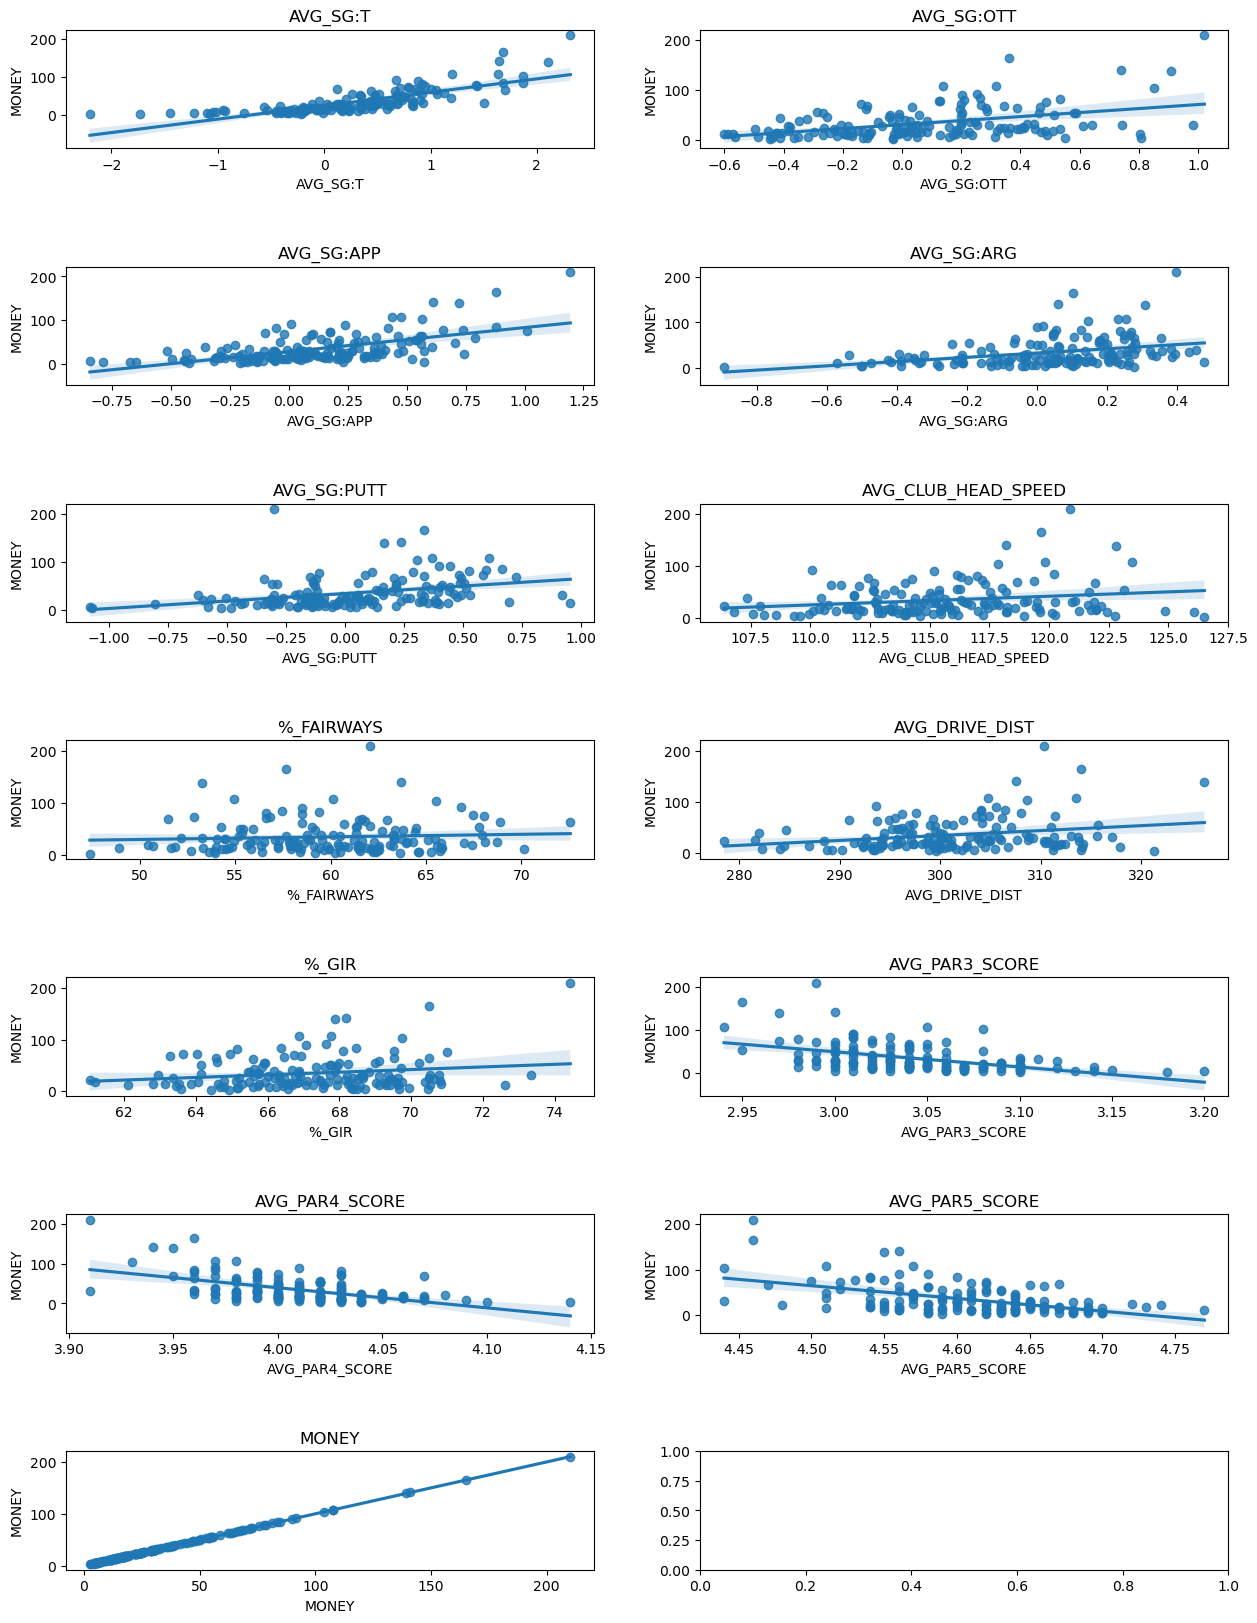

In [69]:
#Set up the subplots
num_plots = len(float_columns)
cols_per_row = 2  # You can adjust this based on your preference
num_rows = -(-num_plots // cols_per_row)  # Calculate the number of rows needed

# Create subplots
f, ax = plt.subplots(num_rows, 2, figsize=(15, 20))

row = 0
col = 0
# Iterate through float columns and create distribution plots
for i, column in enumerate(float_columns):
    g = sns.regplot(x=df_merge[column], y="MONEY", ax=ax[row][col], data=df_merge)
    g.set(title=column)
    col += 1
    if col == 2:
        col = 0
        row += 1

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

This set of graphs has a lot to unpack! Firstly, most notably, average total strokes gained seems to be quite correlated with money earned throughout the season as the average strokes gained increased, there was a general increase in the amount of money a given player made. '

An opposite correlation can be observed with average par3, par4, and par5 scores. This is obviously due to the way that golf scoring is done. As players scored, on average, higher on each respective type of hole, their winnings for the year tended to decrease.

Finally, I was very interested to see that \% of fairways hit seems to have little correlation with money earned as us amateur golfers are always told to "find the short grass." This indicates a great level of proficiency from shots in the thicker rough and on the short-grassed fairway. Similarly average drive distance doesn't correlate with money earned. This challenges the typical preconceived notion that the closer you get to the hole on a drive, the better you do.

<Axes: >

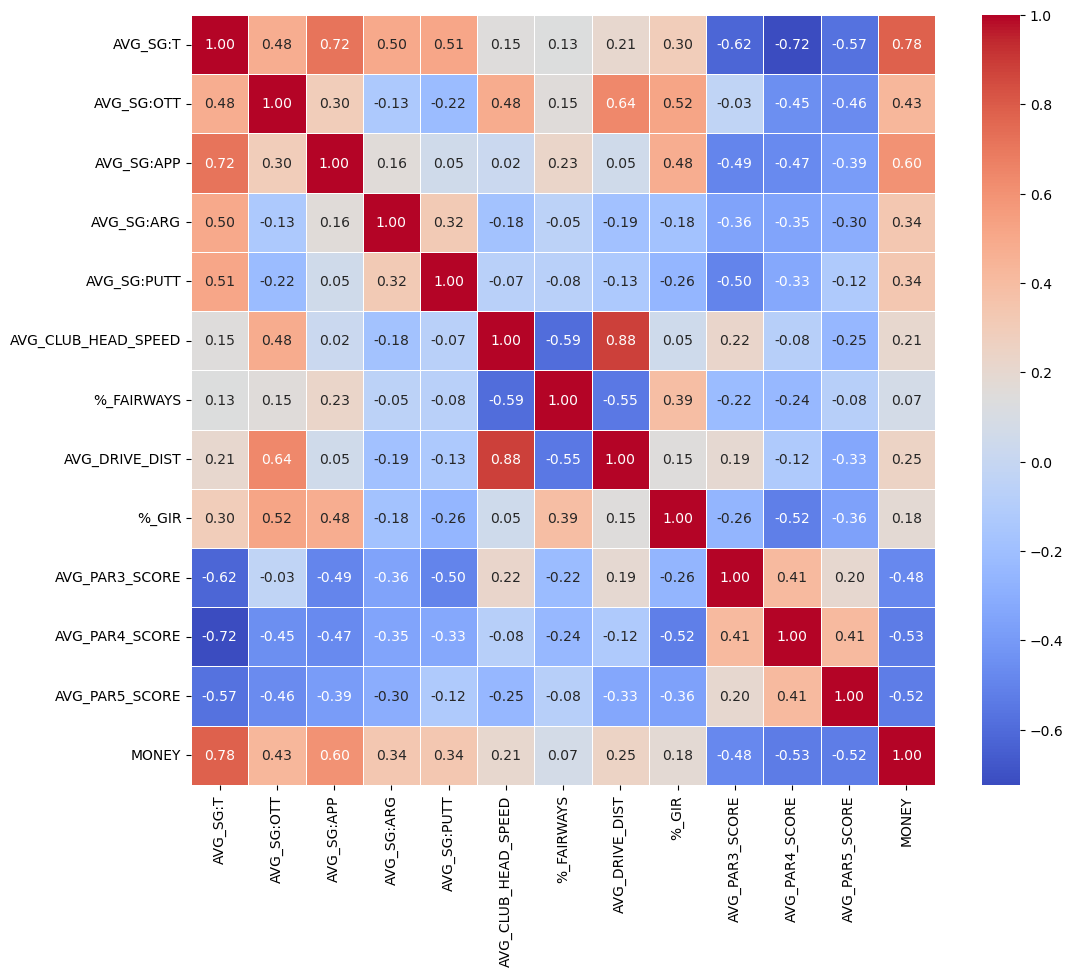

In [70]:
float_columns = df_merge.select_dtypes(include='float64').columns
correlation_matrix = df_merge[float_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
